# Customized Visualization

---
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*


In [11]:
# Using the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [12]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st

<IPython.core.display.Javascript object>


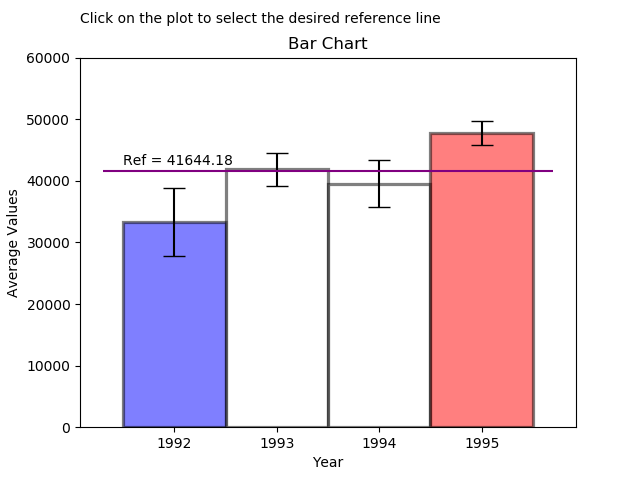

Text(0.13,290.8,'Click inside the plot to select the desired reference line')

In [13]:
n = len(df.loc[1992])   # Sample Size
crit_alpha = 0.05  # Level of significance 
t_crit = st.t.ppf(crit_alpha,n-1)  # Critical t-value

se = df.T.std()/(np.sqrt(n))   # Standard error
err_width = abs(t_crit)*se # Erro width for confidence intervals

poi_yval = 35000

fig,ax = plt.subplots()

plt.sca(ax)
cont = (plt.bar(df.index.values, df.mean(axis = 1),width= 1,tick_label= ['1992','1993','1994','1995'],yerr = err_width,
              edgecolor ='black', linewidth = 0.9,alpha = 0.5))
matplotlib.rcParams['errorbar.capsize'] = 8 
plt.ylim([0,60000])
ax.hlines(poi_yval,xmin = ax.axis()[0], xmax = ax.axis()[1],color = 'purple',label ='{}'.format(poi_yval))

conf_intervals = [df.mean(axis =1) - err_width,df.mean(axis =1) +err_width]
val1 = list(set(conf_intervals[0][conf_intervals[0] < poi_yval].index.values) & 
                set(conf_intervals[1][conf_intervals[1] > poi_yval].index.values))
val2 = conf_intervals[1][conf_intervals[1] < poi_yval].index.values
val3 = conf_intervals[0][conf_intervals[0] > poi_yval].index.values
    
val21 = list(set(val2) - set(val1))
val321 = list(set(val3) - set(val21))
    
ind = df.index.values
num = np.arange(len(ind))
Ba = dict(zip(ind,num))
    
if ((conf_intervals[0] < poi_yval) & (conf_intervals[1] > poi_yval)).any():
    #print(val1)
    if (len(val1) > 0):
        for i in range(len(val1)):
            #print(i)
            cont.patches[Ba[val1[i]]].set_color('white')
            cont.patches[Ba[val1[i]]].set_edgecolor('black')
            cont.patches[Ba[val1[i]]].set_linewidth(2.3)
if (conf_intervals[1]<poi_yval).any():
    if (len(val21) > 0):
        for i in range(len(val21)):
            #print(i)
            cont.patches[Ba[val21[i]]].set_color('blue')
            cont.patches[Ba[val21[i]]].set_edgecolor('black')
            cont.patches[Ba[val21[i]]].set_linewidth(2.3)
if (conf_intervals[0] > poi_yval).any():
    #print(val3)
    if (len(val321) > 0):
        for i in range(len(val321)):
            #print(i)
            cont.patches[Ba[val321[i]]].set_color('red')
            cont.patches[Ba[val321[i]]].set_edgecolor('black')
            cont.patches[Ba[val321[i]]].set_linewidth(2.3)
plt.annotate('Ref = {0:5.2f}'.format(poi_yval), [1991.5,poi_yval + 1000])
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.title('Bar Chart')
text= 'Click inside the plot to select the desired reference line'
plt.annotate(text,[0.130,290.8],xycoords = 'axes points')

In [14]:
def onclick(event):
    plt.cla()
    poi_yval = event.ydata
    n = len(df.loc[1992])   # Sample Size
    crit_alpha = 0.05  # Level of significance 
    t_crit = st.t.ppf(crit_alpha,n-1)  # Critical t-value

    se = df.T.std()/(np.sqrt(n))   # Standard error
    err_width = abs(t_crit)*se # Erro width for confidence intervals
    cont = (plt.bar(df.index.values, df.mean(axis = 1),width= 1,tick_label= ['1992','1993','1994','1995'],yerr = err_width,
                  edgecolor ='black', linewidth =0.9,alpha = 0.5))
    matplotlib.rcParams['errorbar.capsize'] = 8 
    plt.ylim([0,60000])
    ax.hlines(poi_yval,xmin = ax.axis()[0], xmax = ax.axis()[1],color = 'purple')

    conf_intervals = [df.mean(axis =1) - err_width,df.mean(axis =1) +err_width]
    val1 = list(set(conf_intervals[0][conf_intervals[0] < poi_yval].index.values) & 
                    set(conf_intervals[1][conf_intervals[1] > poi_yval].index.values))
    val2 = conf_intervals[1][conf_intervals[1] < poi_yval].index.values
    val3 = conf_intervals[0][conf_intervals[0] > poi_yval].index.values

    val21 = list(set(val2) - set(val1))
    val321 = list(set(val3) - set(val21))

    ind = df.index.values
    num = np.arange(len(ind))
    Ba = dict(zip(ind,num))

    if ((conf_intervals[0] < poi_yval) & (conf_intervals[1] > poi_yval)).any():
        #print(val1)
        if (len(val1) > 0):
            for i in range(len(val1)):
                #print(i)
                cont.patches[Ba[val1[i]]].set_color('white')
                cont.patches[Ba[val1[i]]].set_edgecolor('black')
                cont.patches[Ba[val1[i]]].set_linewidth(2.3)
    if (conf_intervals[1]<poi_yval).any():
        if (len(val21) > 0):
            for i in range(len(val21)):
                #print(i)
                cont.patches[Ba[val21[i]]].set_color('blue')
                cont.patches[Ba[val21[i]]].set_edgecolor('black')
                cont.patches[Ba[val21[i]]].set_linewidth(2.3)
    if (conf_intervals[0] > poi_yval).any():
        #print(val3)
        if (len(val321) > 0):
            for i in range(len(val321)):
                #print(i)
                cont.patches[Ba[val321[i]]].set_color('red')
                cont.patches[Ba[val321[i]]].set_edgecolor('black')
                cont.patches[Ba[val321[i]]].set_linewidth(2.3)
    plt.annotate('Ref = {0:5.2f}'.format(poi_yval), [1991.5,poi_yval + 1000])
    plt.xlabel('Year')
    plt.ylabel('Average Values')
    plt.title('Bar Chart')
    text= 'Click on the plot to select the desired reference line'
    plt.annotate(text,[0.130,290.8],xycoords = 'axes points')
    fig.canvas.draw_idle()
plt.gcf().canvas.mpl_connect('button_press_event',onclick)

7